# Ритейл - Анализ программы лояльности

## Декомпозиция

### Заказчик
Менеджер проекта "Программа лояльности" магазина строительных материалов "Строили, строили и наконец построили".

### Цель
Проанализировать программу лояльности магазина строительных материалов, сделать выводы и рекомендации для заказчика.

### Задачи
1. Провести исследовательский анализ данных;
2. Провести аналих программы лояльности;
3. Проверить статистические гипотезы;
4. Вывод и рекомендации по результатам исследования;
5. Подготовка презентации;
6. Построение дашборда.

### Описание данных
Датасет содержит данные о покупках в магазине строительных материалов «Строили, строили и наконец построили». Все покупатели могут получить доступ в магазин с использованием персональных карт. За 200 рублей в месяц они могут стать участниками программы лояльности. В программу включены скидки, специальные предложения, подарки.

Файл retail_dataset.csv:
* purchaseId — id чека;
* item_ID — id товара;
* purchasedate — дата покупки;
* Quantity — количество товара;
* CustomerID — id покупателя;
* ShopID — id магазина;
* loyalty_program — участвует ли покупатель в программе лояльности.

Файл product_codes.csv:
* productID — id товара;
* price_per_one — стоимость одной единицы товара.

### Ход исследования

**1. Обзор и предобработка данных.**

О качестве данных ничего неизвестно. Поэтому перед исследованием и проверкой гипотез понадобится обзор и предобработка данных.

Проверим их на наличие ошибок (например, дубликатов), несоответствие типов данных, приведем наименование колонок к единому стилю, оценим влияние пропусков на исследование. Подкорректируем и исправим всё, что критично для нашего исследования.

**2. EDA**
* Определим общее количество покупок и уникальных покупателей в данных.
* Рассчитаем общую сумму продаж.
* Рассчитаем долю покупателей, участвующих в программе лояльности.
* Рассчитаем среднее количество покупок на одного уникального покупателя, на одного лояльного покупателя.
* Исследуем распределение количества товаров в каждой покупке и определите среднее количество товаров в чеке.
* Определим наиболее популярные товары и менее популярные и рассмотрим их долю в общем объеме продаж. Построим соотвествующую визуализацию.
* Определим наиболее популярные магазины, рассчитаем объем продаж в каждом магазине.
* Проанализируем даты покупок и определим популярные дни недели или месяцы для покупок. Построим соотвествующую визуализацию.
* Рассмотрим изменение объема продаж с течением времени и выявим возможные тренды или сезонность в данных. Построим соотвествующую визуализацию.

**3. Анализ программы лояльности**
* Проведём когортный анализ, выделим когорты по типу участия в программе лояльности: группировка участников на основе их участия или неучастия в программе;
* Составим профили пользователей;
* Рассчитаем две важные для исследования метрики: LTV (Customer Lifetime Value) и RCR (Repeat Customer Rate). Используем LTV для разных когорт участников. Метрикой RCR оценим  эффективность программы в удержании клиентов. Общий анализ LTV и RCR позволит понять, насколько успешно функционирует программа лояльности;
* Построим соотвествующие визуализации.

**4. Проверка гипотез**

Проверим две статистические гипотезы. В качестве уровня значимости alpha примем 0.05 (5%).

*Гипотеза 1. Средний чек участников программы лояльности отличается от среднего чека неучастников.*
* Нулевая гипотеза (H0): Средний чек участников программы лояльности равен среднему чеку неучастников.
* Альтернативная гипотеза (H1): Средний чек участников программы лояльности отличается от среднего чека неучастников.


*Гипотеза 2. Количество покупок зависит от участия в программе лояльности.*
* Нулевая гипотеза (H0): Количество покупок не зависит от участия в программе лояльности.
* Альтернативная гипотеза (H1): Количество покупок зависит от участия в программе лояльности.

**5. Выводы и рекомендации**

По результатам анализа выявим была ли эффективна программа лояльности клиентов, если нет, то предложим способы повышения эффективности, а если эффективна то порекомендуем какие ещё клиентов стоит подключить к программе в первую очередь.


## Обзор и предобработка данных

In [ ]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import datetime as dt
import warnings
from plotly import graph_objects as go
import matplotlib.cm as cm
from datetime import datetime, timedelta
import warnings
from pandas.core.common import SettingWithCopyWarning
from scipy.stats import mannwhitneyu
from statistics import mode
import calendar

In [ ]:
# выставляем ограничение на показ знаков после запятой
pd.options.display.float_format = '{:,.3f}'.format

In [ ]:
#выключим уведомление об ошибке
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

In [ ]:
#считываем файлы и импортируем их
product_codes = pd.read_csv('https://code.s3.yandex.net/datasets/product_codes.csv')
retail = pd.read_csv('https://code.s3.yandex.net/datasets/retail_dataset.csv')

In [ ]:
product_codes.info()
product_codes.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


,productID,price_per_one
561,22500,4.950
3963,22088,5.910
8909,85124C,4.960
9662,22488,1.450
769,22567,1.250
6737,22915,4.960
5313,85031C,4.950
9658,90026B,8.500
8224,21316,5.790
7619,21458,2.460


In [ ]:
retail.info()
retail.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   ShopID           105335 non-null  object 
 6   loyalty_program  105335 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
102523,540418,22481,1,2017-01-07 11:04:00,NaN,Shop 0,0.000
27273,538092,37467,-178,2016-12-09 14:49:00,NaN,Shop 0,0.000
47052,537434,22262,3,2016-12-06 16:57:00,NaN,Shop 0,0.000
85801,538715,21485,2,2016-12-14 11:03:00,"20,586.000",Shop 0,0.000
66042,539283,85123A,11,2016-12-16 15:47:00,"19,771.000",Shop 0,0.000
102661,541481,22180,1,2017-01-18 12:09:00,"20,375.000",Shop 0,0.000
7707,541219,22111,1,2017-01-14 14:06:00,NaN,Shop 0,0.000
45249,537755,21524,9,2016-12-08 11:31:00,"22,204.000",Shop 0,1.000
56175,542646,21563,2,2017-01-31 11:42:00,"22,899.000",Shop 0,1.000
51195,540418,85094,0,2017-01-07 11:04:00,NaN,Shop 0,0.000


Для начала переименую столбцы в один стиль, столбец purchasedate приведём к дате. Пропуски есть только в CustomerID, но их обрабатывать мы не будем. Пропуски в данном столбце означают, что у покупателя нет карты постоянного клиента, но это всё тот же покупатель. Далее посмотрим на выбросы, если они есть обработаем.

In [ ]:
#переименуем столбцы
product_codes.rename(columns={'productID' : 'product_id'}, inplace = True)
retail.rename(columns={'purchaseid': 'purchase_id', 'item_ID': 'item_id', 'Quantity': 'quantity', 'purchasedate' : 'purchase_date', 'CustomerID': 'customer_id', 'ShopID': 'shop_id'}, inplace = True)
retail.columns

Index(['purchase_id', 'item_id', 'quantity', 'purchase_date', 'customer_id',
       'shop_id', 'loyalty_program'],
      dtype='object')

In [ ]:
#приведём к необходимым типам
retail['purchase_date'] = pd.to_datetime(retail['purchase_date'])

### product_codes.

In [ ]:
#проверим на дубликаты
product_codes.duplicated().sum()

0

In [ ]:
#посмотрим уникальные значения id товаров
product_codes['product_id'].unique()

array(['85123A', '71053', '84406B', ..., '90187A', '90001A', '20738'],
      dtype=object)

In [ ]:
product_codes['product_id'].nunique()

3159

В кодировке встречаются, буквы, преобразование к Int не уместно.

In [ ]:
#посмотрим действительно ли для каждого продукта указана одна цена
product_codes.groupby('product_id')['price_per_one'].unique().reset_index().sample(10)

,product_id,price_per_one
1343,22482,"[1.25, 2.46, 1.06]"
299,21031,"[1.25, 2.51, 0.85, 0.83]"
1563,22714,"[0.42, 0.85, 0.36, 0.83]"
1903,35916A,"[1.66, 1.63]"
622,21533,"[4.95, 4.25, 10.17, 9.96]"
2857,90028,"[8.49, 8.32]"
2029,47570b,"[21.23, 20.79]"
2860,90030C,"[5.94, 5.82]"
10,15034,"[0.14, 0.85, 0.83]"
762,21746,"[1.25, 2.51, 2.46, 1.06]"


На один товар мы можем увидеть несколько указанных цен, думаю стоит заменить значение медианой.

In [ ]:
product_codes = product_codes.groupby('product_id')['price_per_one'].median().reset_index()

In [ ]:
product_codes.describe()

,price_per_one
count,"3,159.000"
mean,6.709
std,119.660
min,0.000
25%,1.478
50%,2.690
75%,4.980
max,"6,706.710"


Среднее почти в 10 раз больше медианы, это говорит либо о большой скошенности в данных, либо о выбросах. Минимальная цена - 0 скорее всего это акционный товар, который можно было приобрести за данную стоимость, а максимальное же значение 16888.

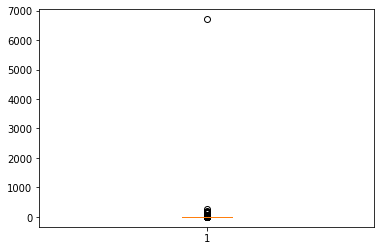

In [ ]:
plt.boxplot(x=product_codes['price_per_one'])
plt.show()

Очень много выбросов, оставем только те строки, в которых значения столбца не превышают 95-й перцентиль.

In [ ]:
product_codes = product_codes[~(product_codes['price_per_one'] > np.nanpercentile(product_codes['price_per_one'], 95))]

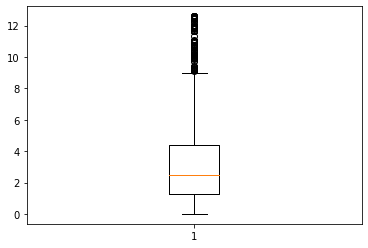

In [ ]:
plt.boxplot(x=product_codes['price_per_one'])
plt.show()

In [ ]:
product_codes.sample(10)

,product_id,price_per_one
1465,22611,9.960
2756,85177,0.850
2293,84507B,2.550
1302,22438,1.660
985,22089,4.130
1922,35969,0.000
2773,85189,0.850
2343,84580,4.130
1831,22996,0.420
3149,DCGSSGIRL,3.290


### retail

In [ ]:
display(retail['purchase_date'].min())
retail['purchase_date'].max()

Timestamp('2016-12-01 08:26:00')

Timestamp('2017-02-28 17:04:00')

Мы располагаем данными с 1 декабря 2016 года по 28 февраля 2017 года. Период охвата данными - 3 месяца.

In [ ]:
#проверим на дубликатов
retail.duplicated().sum()

1033

Такое большое количество дубликатов можно объяснить особенностью сбора данных, т.к. в чеке могут быть отдельные записи для одного и того же товара, может быть написано «молоток-количество 2», а может быть написано «молоток – количество1, молоток – количество1». Поэтому дубликаты оставляем.

In [ ]:
retail['quantity'].describe()

count   105,335.000
mean          7.821
std         327.947
min     -74,216.000
25%           0.000
50%           2.000
75%           7.000
max      74,214.000
Name: quantity, dtype: float64

Очень много значений где количество меньше нулю, нужно посмотреть подробнее.

In [ ]:
q = retail.query('quantity < 0')
q.head(10)

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
64,C539944,22776,-2,2016-12-23 11:38:00,"20,239.000",Shop 0,0.000
109,C542910,20726,-2,2017-02-01 15:38:00,"23,190.000",Shop 0,1.000
112,C542426,22418,-25,2017-01-28 09:32:00,"19,825.000",Shop 0,0.000
253,C539726,22791,-11,2016-12-21 14:24:00,"22,686.000",Shop 0,1.000
344,C544034,21878,-2,2017-02-15 11:28:00,"20,380.000",Shop 0,0.000
458,C539667,21285,-25,2016-12-21 10:47:00,"18,827.000",Shop 0,0.000
468,537032,21275,-31,2016-12-03 16:50:00,NaN,Shop 0,0.000
503,540119,22865,-61,2017-01-05 10:07:00,NaN,Shop 0,0.000
636,C543764,79191D,-13,2017-02-11 15:16:00,"22,714.000",Shop 0,1.000
660,C537602,22423,-3,2016-12-07 12:45:00,"23,190.000",Shop 0,1.000


In [ ]:
q['shop_id'].unique()

array(['Shop 0', 'Shop 4', 'Shop 7', 'Shop 19', 'Shop 12', 'Shop 2',
       'Shop 11', 'Shop 6', 'Shop 3', 'Shop 1', 'Shop 21', 'Shop 8',
       'Shop 23', 'Shop 16', 'Shop 14', 'Shop 10', 'Shop 18', 'Shop 20'],
      dtype=object)

In [ ]:
q['purchase_date'].unique()

array(['2016-12-23T11:38:00.000000000', '2017-02-01T15:38:00.000000000',
       '2017-01-28T09:32:00.000000000', '2016-12-21T14:24:00.000000000',
       '2017-02-15T11:28:00.000000000', '2016-12-21T10:47:00.000000000',
       '2016-12-03T16:50:00.000000000', '2017-01-05T10:07:00.000000000',
       '2017-02-11T15:16:00.000000000', '2016-12-07T12:45:00.000000000',
       '2016-12-16T14:32:00.000000000', '2017-01-07T10:56:00.000000000',
       '2017-01-14T14:33:00.000000000', '2016-12-20T15:52:00.000000000',
       '2017-01-04T10:48:00.000000000', '2017-01-05T15:17:00.000000000',
       '2017-02-11T15:47:00.000000000', '2017-01-21T16:53:00.000000000',
       '2017-01-04T14:29:00.000000000', '2016-12-07T15:51:00.000000000',
       '2017-01-06T12:58:00.000000000', '2017-02-21T13:58:00.000000000',
       '2017-01-18T14:24:00.000000000', '2017-02-11T17:13:00.000000000',
       '2016-12-09T13:40:00.000000000', '2016-12-14T13:05:00.000000000',
       '2016-12-09T13:38:00.000000000', '2017-01-09

Такие отрицательные значения не связаны ни с определенной датой, ни с каким-то конкретным магазином, скорее всего это сбой в системе или особенность кассовых аппаратов. Заменим эти значения на положительные.

In [ ]:
retail['quantity'] = retail['quantity'].abs()

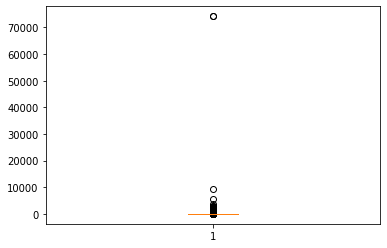

In [ ]:
plt.boxplot(x=retail['quantity'])
plt.show()

Очень много выбросов, оставем только те строки, в которых значения столбца не превышают 96-й перцентиль.

In [ ]:
retail = retail[~(retail['quantity'] > np.nanpercentile(retail['quantity'], 96))]

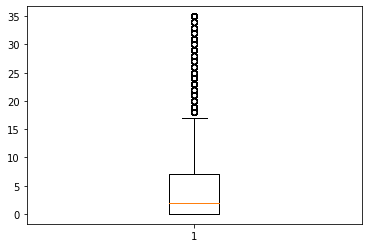

In [ ]:
plt.boxplot(x=retail['quantity'])
plt.show()

In [ ]:
retail.sample(10)

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
71489,539088,22768,31,2016-12-16 09:45:00,"18,772.000",Shop 0,0.000
4868,544778,21166,0,2017-02-23 12:03:00,"20,657.000",Shop 0,0.000
67287,540473,84997B,1,2017-01-07 14:31:00,"22,963.000",Shop 0,1.000
97915,545166,22507,0,2017-02-28 14:03:00,"22,706.000",Shop 0,1.000
56891,542890,22170,1,2017-02-01 13:25:00,"20,990.000",Shop 0,0.000
91022,538349,22124,2,2016-12-10 14:59:00,NaN,Shop 0,0.000
13697,538853,22285,2,2016-12-14 13:35:00,"22,484.000",Shop 0,1.000
67456,540545,22348,11,2017-01-09 15:35:00,"19,130.000",Shop 0,0.000
47549,542898,22560,1,2017-02-01 14:01:00,"21,789.000",Shop 0,0.000
89636,539736,37370,0,2016-12-21 15:18:00,NaN,Shop 0,0.000


### data

In [ ]:
#соединим два датафрейма в один
data = retail.merge(product_codes, left_on='item_id', right_on='product_id', how='inner')
data = data.drop('product_id', axis=1)
data.head(10)

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,"18,427.000",Shop 0,0.000,1.630
1,541104,21873,0,2017-01-13 14:29:00,NaN,Shop 0,0.000,1.630
2,540418,21873,1,2017-01-07 11:04:00,NaN,Shop 0,0.000,1.630
3,541516,21873,2,2017-01-18 17:34:00,NaN,Shop 0,0.000,1.630
4,541566,21873,35,2017-01-19 11:50:00,"23,401.000",Shop 0,1.000,1.630
5,538843,21873,1,2016-12-14 13:18:00,"21,712.000",Shop 0,0.000,1.630
6,540838,21873,11,2017-01-11 15:13:00,"19,541.000",Shop 0,0.000,1.630
7,543592,21873,5,2017-02-10 11:57:00,"22,922.000",Shop 0,1.000,1.630
8,545062,21873,0,2017-02-27 14:07:00,"18,427.000",Shop 0,0.000,1.630
9,540480,21873,11,2017-01-07 15:27:00,"18,159.000",Shop 4,0.000,1.630


In [ ]:
data['revenue'] = data['quantity'] * data['price_per_one']
data.head(10)

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,price_per_one,revenue
0,538280,21873,11,2016-12-10 12:50:00,"18,427.000",Shop 0,0.000,1.630,17.930
1,541104,21873,0,2017-01-13 14:29:00,NaN,Shop 0,0.000,1.630,0.000
2,540418,21873,1,2017-01-07 11:04:00,NaN,Shop 0,0.000,1.630,1.630
3,541516,21873,2,2017-01-18 17:34:00,NaN,Shop 0,0.000,1.630,3.260
4,541566,21873,35,2017-01-19 11:50:00,"23,401.000",Shop 0,1.000,1.630,57.050
5,538843,21873,1,2016-12-14 13:18:00,"21,712.000",Shop 0,0.000,1.630,1.630
6,540838,21873,11,2017-01-11 15:13:00,"19,541.000",Shop 0,0.000,1.630,17.930
7,543592,21873,5,2017-02-10 11:57:00,"22,922.000",Shop 0,1.000,1.630,8.150
8,545062,21873,0,2017-02-27 14:07:00,"18,427.000",Shop 0,0.000,1.630,0.000
9,540480,21873,11,2017-01-07 15:27:00,"18,159.000",Shop 4,0.000,1.630,17.930


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96606 entries, 0 to 96605
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   purchase_id      96606 non-null  object        
 1   item_id          96606 non-null  object        
 2   quantity         96606 non-null  int64         
 3   purchase_date    96606 non-null  datetime64[ns]
 4   customer_id      61894 non-null  float64       
 5   shop_id          96606 non-null  object        
 6   loyalty_program  96606 non-null  float64       
 7   price_per_one    96606 non-null  float64       
 8   revenue          96606 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 7.4+ MB


По итогу предобработки данных были оставлены дубликаты, проведена работа с выбросами, столбцы приведены к единому стилю и необходимым типам, получен датафрейм для анализа данных.

## EDA

Рассчитаем общее количество покупок и число уникальных покупателей.

In [ ]:
print('Общее количество покупок: ', data['purchase_id'].nunique())
print('Число уникальных покупателей: ', data['customer_id'].nunique())

Общее количество покупок:  4319
Число уникальных покупателей:  1666


Рассчитаем общую сумму продаж.

In [ ]:
print('Общая сумма продаж: ', round((data['quantity'] * data['price_per_one']).sum()), 2)

Общая сумма продаж:  1271183 2


Посмотрим сколько лояльных клиентов представлена и каков их процент, а также количество нелояльных клиентов.

In [ ]:
loyalty = data.query('loyalty_program == 1')
not_loyalty = data.query('loyalty_program == 0')

#количество лояльных и нелояльных клиентов
loyalty_count = loyalty['customer_id'].nunique()
print(f'Количество лояльных клиентов: {loyalty_count}')
print('В программе лояльности учавствуют: ', round(loyalty_count / data['customer_id'].nunique() * 100, 2), '%')
not_loyalty_count = not_loyalty['customer_id'].nunique()
print(f'Количество нелояльных клиентов: {not_loyalty_count}')

Количество лояльных клиентов: 563
В программе лояльности учавствуют:  33.79 %
Количество нелояльных клиентов: 1103


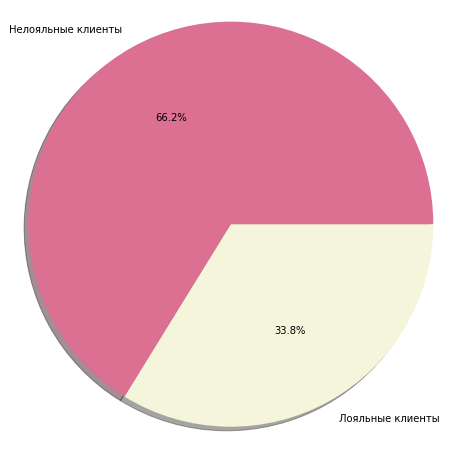

In [ ]:
#построим круговую диаграмму
values = [loyalty_count, not_loyalty_count]  # Список значений
labels = ['Лояльные клиенты', 'Нелояльные клиенты']  # Список меток

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', counterclock=False, shadow=True, colors=['beige', 'palevioletred'])
plt.axis('equal')
plt.show()

Рассчитаем среднее количество покупок на одного уникального покупателя, на одного лояльного клиента и на одного нелояльного клиента.


In [ ]:
print('Среднее количество покупок на одного уникального покупателя:' , round(data.dropna(subset=['customer_id'])['purchase_id'].nunique() / data['customer_id'].nunique()))
print('Среднее количество покупок на одного лояльного клиента: ', round(loyalty['purchase_id'].nunique() / loyalty_count ))
print('Среднее количество покупок на одного нелояльного клиента: ', round(not_loyalty['purchase_id'].nunique() / not_loyalty_count))

Среднее количество покупок на одного уникального покупателя: 2
Среднее количество покупок на одного лояльного клиента:  2
Среднее количество покупок на одного нелояльного клиента:  3


Среднее количество покупок на одного нелояльного клиента выше, чем для лояльного.

### распределение количества товаров в каждой покупке, среднее количество товаров в чеке

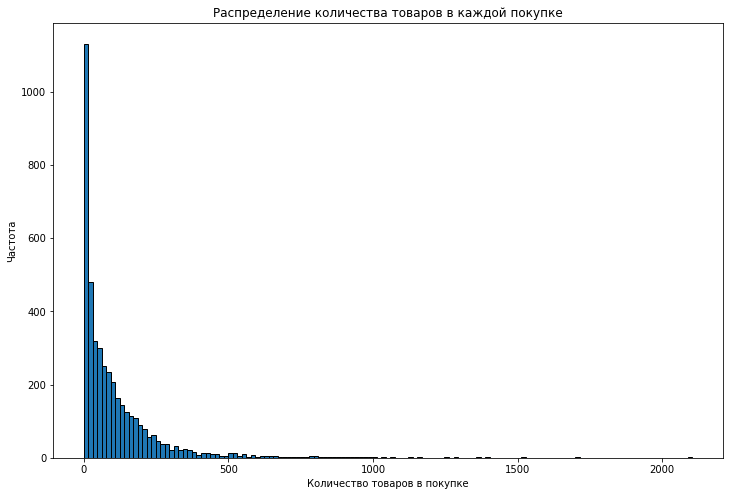

In [ ]:
#построим гистограмму для данных сгруппированных по purchase_id
plt.figure(figsize=(12, 8))
plt.hist(data.groupby('purchase_id')['quantity'].sum(), bins='auto', edgecolor='black')

plt.xlabel('Количество товаров в покупке')
plt.ylabel('Частота')
plt.title('Распределение количества товаров в каждой покупке')
plt.show()

В большинстве своём количество товаров в чеке до 15 шт, 30 шт встречается в 2.5 раза меньше и далее по убыванию, чем больше товаров в чеке, тем реже встречаются такие чеки.

In [ ]:
print('Наиболее встречаемое количество товаров в чеке: ', mode(data.groupby('purchase_id')['quantity'].sum()))

Наиболее встречаемое количество товаров в чеке:  2


### топ-10 товаров

Определим топ-10 товаров для лояльных и нелояльных клиентов.

In [ ]:
top_10_loyalty = (loyalty
          .groupby('item_id')['quantity'].sum()
          .reset_index()
          #.rename(columns={'quantity': 'sum_quantity'})
          .sort_values(by='quantity', ascending=False)
          .head(10))

top_10_loyalty['%'] = top_10_loyalty['quantity'] / sum(top_10_loyalty['quantity']) * 100
top_10_loyalty

,item_id,quantity,%
2088,85123A,1405,19.977
1959,84879,828,11.773
1526,22961,643,9.143
1533,22969,640,9.100
1775,79321,608,8.645
729,21985,602,8.560
2078,85099B,600,8.531
1115,22469,598,8.503
1134,22492,569,8.090
317,21212,540,7.678


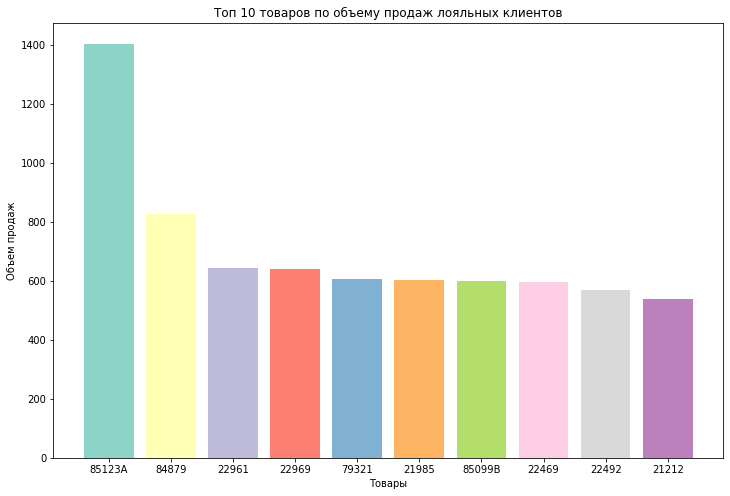

In [ ]:
plt.figure(figsize=(12, 8))
colors = sns.color_palette('Set3', n_colors=10)
plt.bar(top_10_loyalty['item_id'], top_10_loyalty['quantity'], color=colors)


plt.xlabel('Товары')
plt.ylabel('Объем продаж')
plt.title('Топ 10 товаров по объему продаж лояльных клиентов')
plt.show()

Наиболее продающийся товар лояльных клиентов - 85123A - около 20% продаж.

In [ ]:
top_10_not_loyalty = (not_loyalty
          .groupby('item_id')['quantity'].sum()
          .reset_index()
          #.rename(columns={'quantity': 'sum_quantity'})
          .sort_values(by='quantity', ascending=False)
          .head(10))

top_10_not_loyalty['%'] = top_10_not_loyalty['quantity'] / sum(top_10_not_loyalty['quantity']) * 100
top_10_not_loyalty

,item_id,quantity,%
2488,85123A,3295,17.480
385,21212,2520,13.369
1673,22961,2025,10.743
2295,84879,1788,9.485
2468,85099B,1732,9.188
1017,22197,1694,8.987
1253,22469,1662,8.817
1680,22969,1420,7.533
2363,84991,1391,7.379
999,22178,1323,7.019


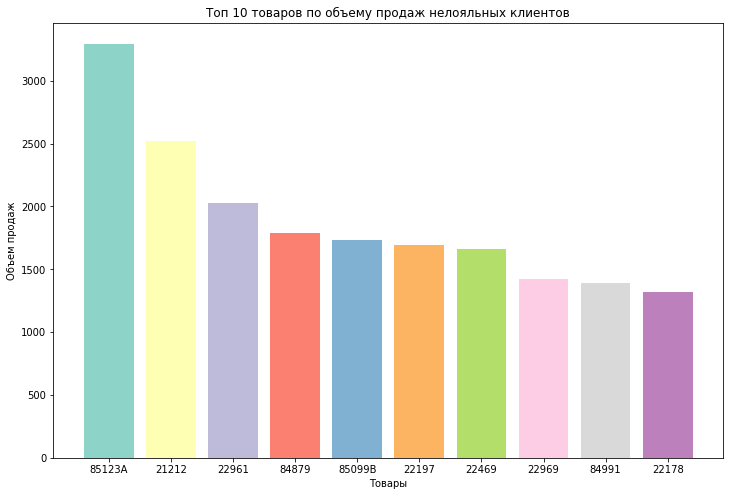

In [ ]:
plt.figure(figsize=(12, 8))
colors = sns.color_palette('Set3', n_colors=10)
plt.bar(top_10_not_loyalty['item_id'], top_10_not_loyalty['quantity'], color=colors)


plt.xlabel('Товары')
plt.ylabel('Объем продаж')
plt.title('Топ 10 товаров по объему продаж нелояльных клиентов')
plt.show()

Наиболее продающийся товар нелояльных клиентов - 85123A - около 20% продаж. Если говорить в целом, то в топ-10 товаров для лояльных и неялольных клиентов входят 7 одинаковых позиций, различается лишь частота покупки.

In [ ]:
not_top_10 = (data
              .groupby('item_id')['quantity'].sum()
              .reset_index()
              .rename(columns={'quantity': 'sum_quantity'})
              .sort_values(by='sum_quantity', ascending=True)
              .head(10))
not_top_10

,item_id,sum_quantity
2989,m,0
1779,35809a,0
1782,35815P,0
493,21372,0
490,21369,0
489,21368,0
488,21367,0
1784,35818P,0
1785,35819B,0
1789,35909A,0


Эти товары скорее всего являются акционными товарами.

### популярные магазины

Выделим топ 10 популярных магазинов.

In [ ]:
popular_shops = (data
                 .groupby('shop_id')['purchase_id'].nunique()
                 .reset_index()
                 .rename(columns={'purchase_id' : 'sum_purchase'})
                 .sort_values('sum_purchase', ascending=False)
                 .head(10))

popular_shops['%'] = popular_shops['sum_purchase'] / sum(popular_shops['sum_purchase']) * 100
popular_shops

,shop_id,sum_purchase,%
0,Shop 0,3935,92.393
24,Shop 4,110,2.583
1,Shop 1,80,1.878
26,Shop 6,45,1.057
4,Shop 12,21,0.493
12,Shop 2,17,0.399
2,Shop 10,15,0.352
28,Shop 8,15,0.352
27,Shop 7,11,0.258
22,Shop 3,10,0.235


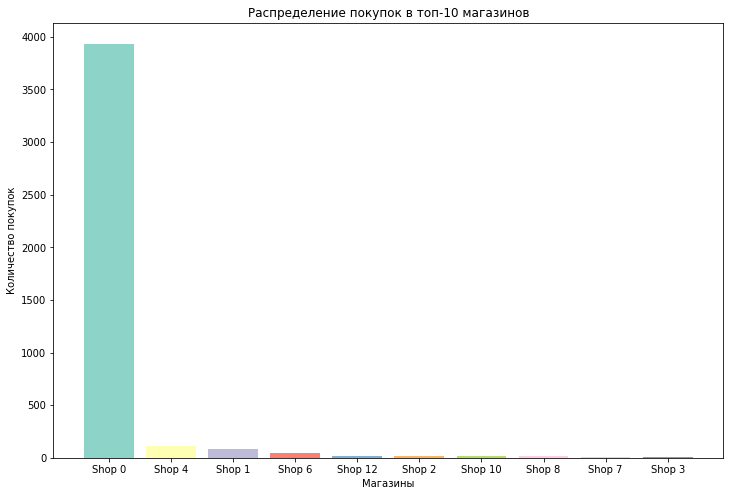

In [ ]:
plt.figure(figsize=(12, 8))
colors = sns.color_palette('Set3', n_colors=10)
plt.bar(popular_shops['shop_id'], popular_shops['sum_purchase'], color=colors)


plt.xlabel('Магазины')
plt.ylabel('Количество покупок')
plt.title('Распределение покупок в топ-10 магазинов')
plt.show()

В основном все покупки совершались в магазине - Shop 0 - 92%.

### временной анализ

Проанализируем покупки с течением времени для лояльных и нелояльных клиентов.

In [ ]:
# создадим столбцы с месяцами и днями недели
data['week'] = data['purchase_date'].dt.dayofweek
data['month'] = data['purchase_date'].dt.month
loyalty = data.query('loyalty_program == 1')
not_loyalty = data.query('loyalty_program == 0')

In [ ]:
#посмотрим распределение покупок по дням недели для лояльных клиентов
day_names = {0: 'Понедельник', 1: 'Вторник', 2: 'Среда', 3: 'Четверг', 4: 'Пятница', 5: 'Суббота'}
week_loyalty = (loyalty
       .groupby('week')['purchase_id'].nunique()
       .reset_index()
       .sort_values(by='purchase_id', ascending=False))

week_loyalty['%'] = week_loyalty['purchase_id'] / sum(week_loyalty['purchase_id']) * 100
week_loyalty['week'] = week_loyalty['week'].replace(day_names)
week_loyalty

,week,purchase_id,%
4,Пятница,280,22.746
3,Четверг,240,19.496
2,Среда,206,16.734
1,Вторник,188,15.272
5,Суббота,171,13.891
0,Понедельник,146,11.860


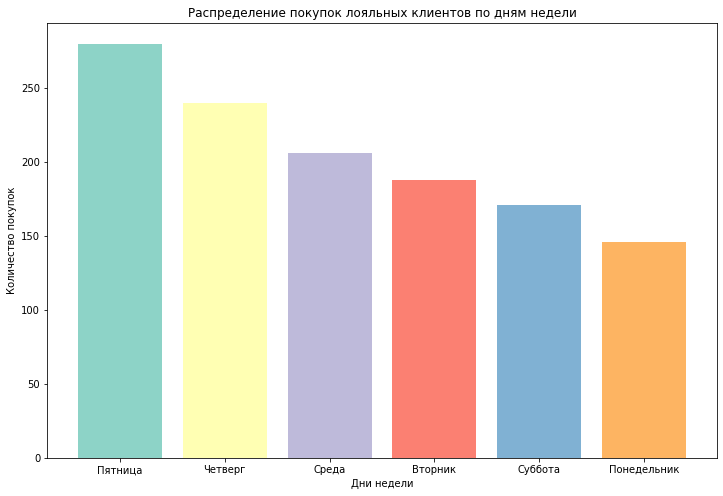

In [ ]:
plt.figure(figsize=(12, 8))
colors = sns.color_palette('Set3', n_colors=10)
plt.bar(week_loyalty['week'], week_loyalty['purchase_id'], color=colors)


plt.xlabel('Дни недели')
plt.ylabel('Количество покупок')
plt.title('Распределение покупок лояльных клиентов по дням недели')
plt.show()

Магазин не работает в воскресенье, наибольшее количество покупок лояльные клиенты совершают в пятницу - 22%, наименьшее же в понедельник - 11%.

In [ ]:
#посмотрим распределение покупок по дням недели для нелояльных клиентов
week_not_loyalty = (not_loyalty
       .groupby('week')['purchase_id'].nunique()
       .reset_index()
       .sort_values(by='purchase_id', ascending=False))

week_not_loyalty['%'] = week_not_loyalty['purchase_id'] / sum(week_not_loyalty['purchase_id']) * 100
week_not_loyalty['week'] = week_not_loyalty['week'].replace(day_names)
week_not_loyalty

,week,purchase_id,%
4,Пятница,670,21.697
3,Четверг,559,18.102
2,Среда,552,17.876
5,Суббота,551,17.843
1,Вторник,515,16.677
0,Понедельник,241,7.804


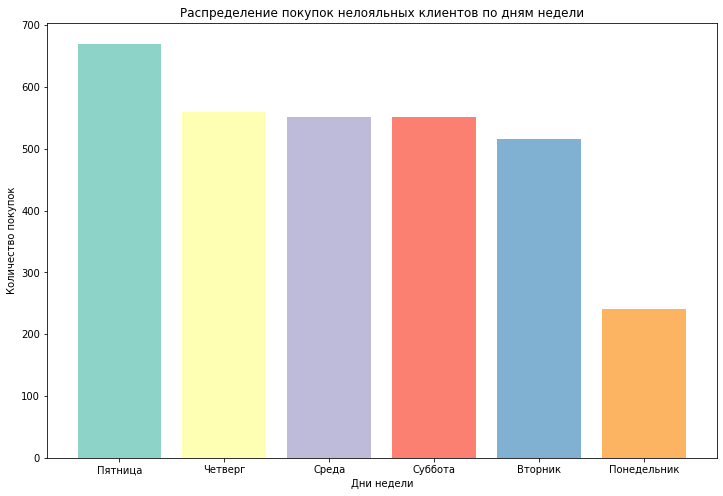

In [ ]:
plt.figure(figsize=(12, 8))
colors = sns.color_palette('Set3', n_colors=10)
plt.bar(week_not_loyalty['week'], week_not_loyalty['purchase_id'], color=colors)


plt.xlabel('Дни недели')
plt.ylabel('Количество покупок')
plt.title('Распределение покупок нелояльных клиентов по дням недели')
plt.show()

Наибольшее количество покупок нелояльные клиенты совершают в понедельник - около 22%, наименьшее же в понедельник - около 8%. Ситуация аналогичная как и с лояльными клиентами.

In [ ]:
#посмотрим распределение покупок лояльных клиентов по дням месяцам
month_names = {1: 'Январь', 2: 'Февраль', 3: 'Март', 4: 'Апрель', 5: 'Май', 6: 'Июнь', 7: 'Июль', 8: 'Август', 9: 'Сентябрь', 10: 'Октябрь', 11: 'Ноябрь', 12: 'Декабрь'}
month_loyalty = (loyalty
       .groupby('month')['purchase_id'].nunique()
       .reset_index())

month_loyalty['%'] = month_loyalty['purchase_id'] / sum(month_loyalty['purchase_id']) * 100
month_loyalty['month'] = month_loyalty['month'].replace(month_names)
month_loyalty

,month,purchase_id,%
0,Январь,318,25.833
1,Февраль,357,29.001
2,Декабрь,556,45.167


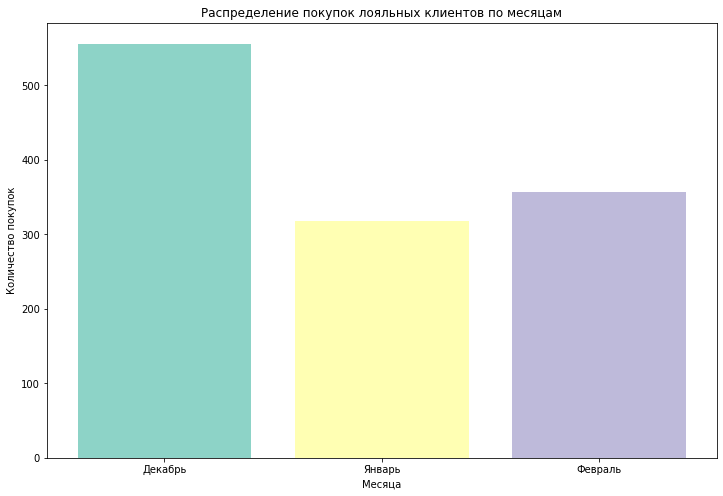

In [ ]:
month_order = ['Декабрь', 'Январь', 'Февраль']

plt.figure(figsize=(12, 8))
colors = sns.color_palette('Set3', n_colors=10)
month_loyalty = month_loyalty.set_index('month').loc[month_order]
plt.bar(month_loyalty.index, month_loyalty['purchase_id'], color=colors)

plt.xlabel('Месяца')
plt.ylabel('Количество покупок')
plt.title('Распределение покупок лояльных клиентов по месяцам')
plt.show()

В декабре лояльные клиенты совершили наибольшее количество покупок - около 45%, наименьшее же в январе - около 26%.

In [ ]:
#посмотрим распределение покупок нелояльных клиентов по дням месяцам
month_not_loyalty = (not_loyalty
       .groupby('month')['purchase_id'].nunique()
       .reset_index())

month_not_loyalty['%'] = month_not_loyalty['purchase_id'] / sum(month_not_loyalty['purchase_id']) * 100
month_not_loyalty['month'] = month_not_loyalty['month'].replace(month_names)
month_not_loyalty

,month,purchase_id,%
0,Январь,983,31.833
1,Февраль,862,27.915
2,Декабрь,1243,40.253


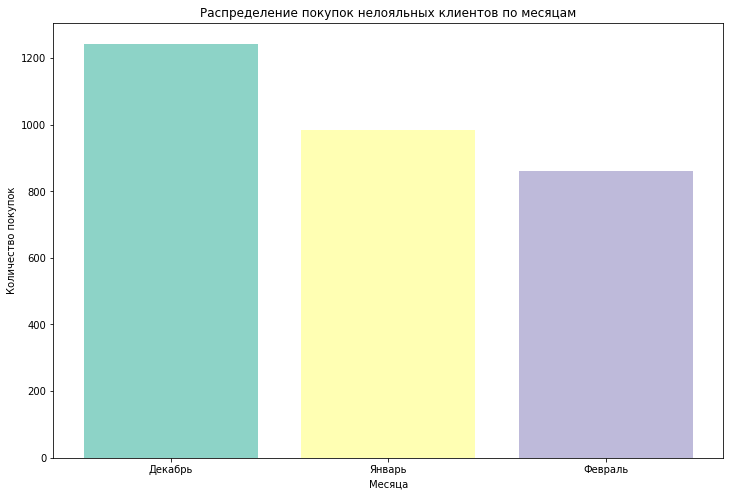

In [ ]:
plt.figure(figsize=(12, 8))
colors = sns.color_palette('Set3', n_colors=10)
month_not_loyalty = month_not_loyalty.set_index('month').loc[month_order]
plt.bar(month_not_loyalty.index, month_not_loyalty['purchase_id'], color=colors)

plt.xlabel('Месяца')
plt.ylabel('Количество покупок')
plt.title('Распределение покупок нелояльных клиентов по месяцам')
plt.show()

В декабре нелояльные клиенты совершили наибольшее количество покупок - около 40%, наименьшее же в январе - около 28%. Как лояльные, нелояльные клиенты предпочитала шопинг в декабре.

### изменение объема продаж с течением времени

In [ ]:
sales_by_date = data.groupby(data['purchase_date'].dt.date)['quantity'].sum()
sales_by_date.head()

purchase_date
2016-12-01    12280
2016-12-02    12241
2016-12-03     8715
2016-12-05     9540
2016-12-06    12556
Name: quantity, dtype: int64

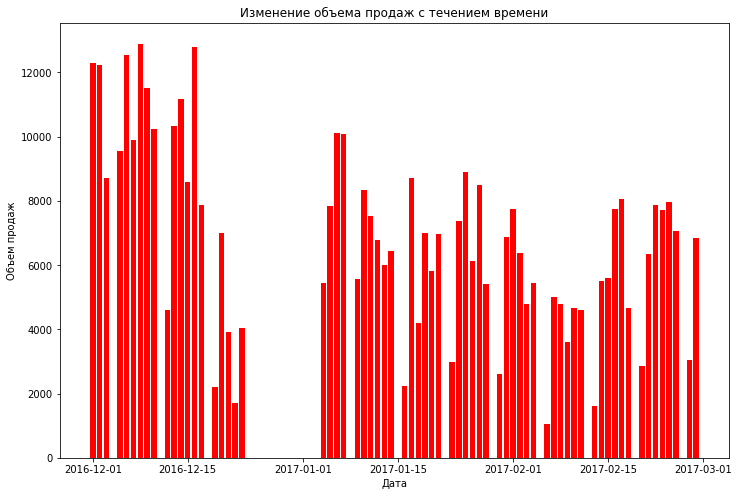

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(sales_by_date.index, sales_by_date.values, color='red')

plt.xlabel('Дата')
plt.ylabel('Объем продаж')
plt.title('Изменение объема продаж с течением времени')
plt.show()

Каких-то определенных тенденций не наблюдается, видны как взлеты, так и падения.

### вывод

* Общее количество покупок:  4319
* Число уникальных покупателей:  1666
* Общая сумма продаж:  1271183.02


* Количество лояльных клиентов: 563
* В программе лояльности учавствуют:  33.79 %
* Количество нелояльных клиентов: 1103


* Среднее количество покупок на одного нелояльного клиента выше, чем для лояльного.
* Наиболее встречаемое количество товаров в чеке:  2.
* Наиболее продающийся товар нелояльных клиентов - 85123A - около 20% продаж. Если говорить в целом, то в топ-10 товаров для лояльных и неялольных клиентов входят 7 одинаковых позиций, различается лишь частота покупки.
* В основном все покупки совершались в магазине - Shop 0 - 92%.
* Магазин не работает в воскресенье, наибольшее количество покупок лояльные клиенты совершают в пятницу - 22%, наименьшее же в понедельник - 11%.
* Наиболее продающийся товар лояльных клиентов - 85123A - около 20% продаж. Наибольшее количество покупок нелояльные клиенты совершают в понедельник - около 22%, наименьшее же в понедельник - около 8%. Ситуация аналогичная как и с лояльными клиентами.
* В декабре лояльные клиенты совершили наибольшее количество покупок - около 45%, наименьшее же в январе - около 26%. В декабре нелояльные клиенты совершили наибольшее количество покупок - около 40%, наименьшее же в январе - около 28%. Как лояльные, нелояльные клиенты предпочитала шопинг в декабре.

##  Анализ программы лояльности

### LTV

Получим пользовательские профили.

In [ ]:
def get_profiles(sessions):

    # сортируем данные по ID клиента и дате покупки
    # группируем по ID клиента и находим первые значения даты покупки
    # столбец с временем первой покупки назовём first_ts
    profiles = (
        data.sort_values(by=['customer_id', 'purchase_date'])
        .groupby('customer_id')
        .agg({'purchase_date': 'first', 'loyalty_program': 'first'})
        .rename(columns={'purchase_date': 'first_ts', 'customer_id': 'user_id'})
        .reset_index()
    )

    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')


    return profiles

In [ ]:
profiles = get_profiles(data)
profiles = profiles.rename(columns={'customer_id': 'user_id'})
profiles.head()

,user_id,first_ts,loyalty_program,dt,month
0,"18,026.000",2016-12-07 14:57:00,0.000,2016-12-07,2016-12-01
1,"18,027.000",2016-12-16 19:09:00,0.000,2016-12-16,2016-12-01
2,"18,029.000",2017-02-02 16:01:00,0.000,2017-02-02,2017-02-01
3,"18,031.000",2017-02-16 12:33:00,0.000,2017-02-16,2017-02-01
4,"18,035.000",2017-01-18 09:50:00,0.000,2017-01-18,2017-01-01


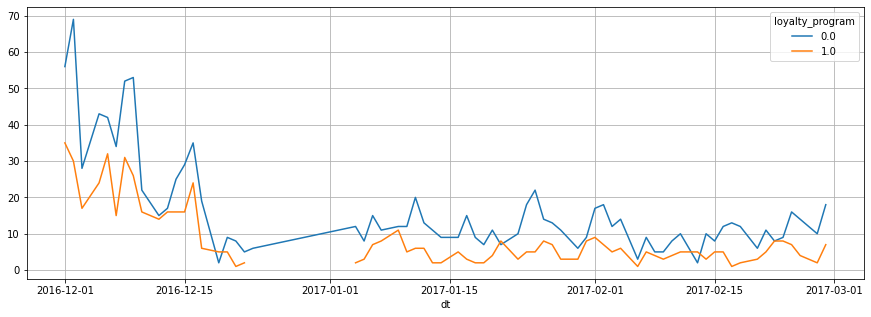

In [ ]:
profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='loyalty_program',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

plt.show()

Рассчитаем LTV.

In [ ]:
def get_ltv(
    profiles,  # Шаг 1. Получить профили и данные о покупках
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Добавить данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )


    # Шаг 3. Рассчитать лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 4. Построить таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Шаг 5. Посчитать сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Шаг 6. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 7. Объединить размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 8. Посчитать LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу LTV
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики LTV убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
    # получаем таблицу динамики LTV
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы LTV и сырые данные
    return result_raw, result_grouped, result_in_time

Получим таблицу orders.

In [ ]:
data['revenue'] = data['quantity'] * data['price_per_one']
orders = data.groupby(['customer_id', 'purchase_date', 'loyalty_program'])['revenue'].sum().reset_index().rename(columns={'purchase_date': 'event_dt', 'customer_id': 'user_id'})
orders['user_id'] = orders['user_id'].astype(int)
orders['month'] = orders['event_dt'].dt.to_period('M')

#добавим подписку +200 для лояльных клиентов
orders_gr = orders.groupby(['month', 'user_id']).first().reset_index()
orders.loc[(orders['loyalty_program'] == 1), 'revenue'] += 200
orders = orders.merge(orders_gr[['month', 'user_id', 'revenue']], on=['month', 'user_id'], how='left')
orders = orders.drop(['revenue_y', 'month', 'loyalty_program'], axis=1).rename(columns={'revenue_x': 'revenue'})
orders.head()

,user_id,event_dt,revenue
0,18026,2016-12-07 14:57:00,955.350
1,18026,2017-01-26 14:30:00,755.700
2,18027,2016-12-16 19:09:00,106.950
3,18027,2017-01-25 10:42:00,28.865
4,18029,2017-02-02 16:01:00,386.180


Момент зададим - 28 февраля 2017 года, горизонт - 45 дней.

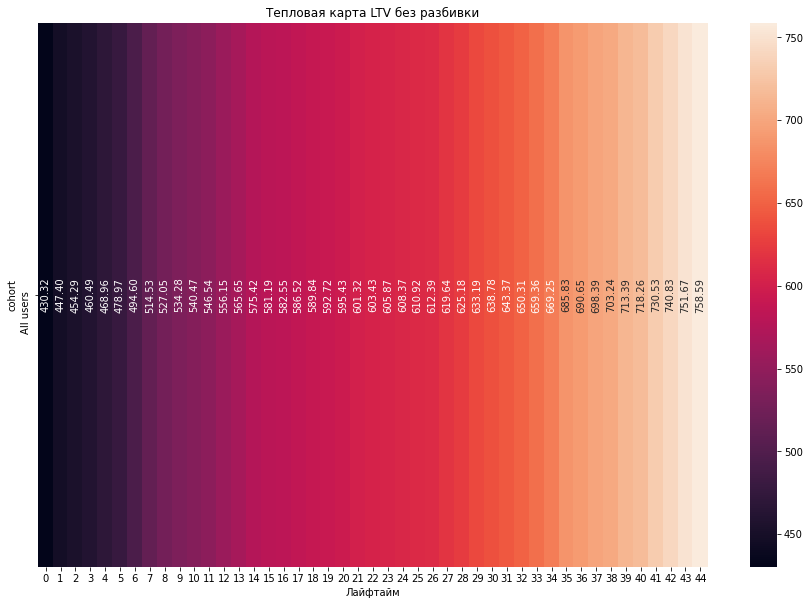

In [ ]:
ltv_raw, ltv, ltv_history = get_ltv(
    profiles, orders, datetime(2017, 2, 28).date(), 45
)

plt.figure(figsize=(15, 10))
sns.heatmap(ltv.drop(columns=['cohort_size']), annot=True, fmt='.2f', annot_kws={"rotation": 90})
plt.title('Тепловая карта LTV без разбивки')
plt.xlabel('Лайфтайм')
plt.show()

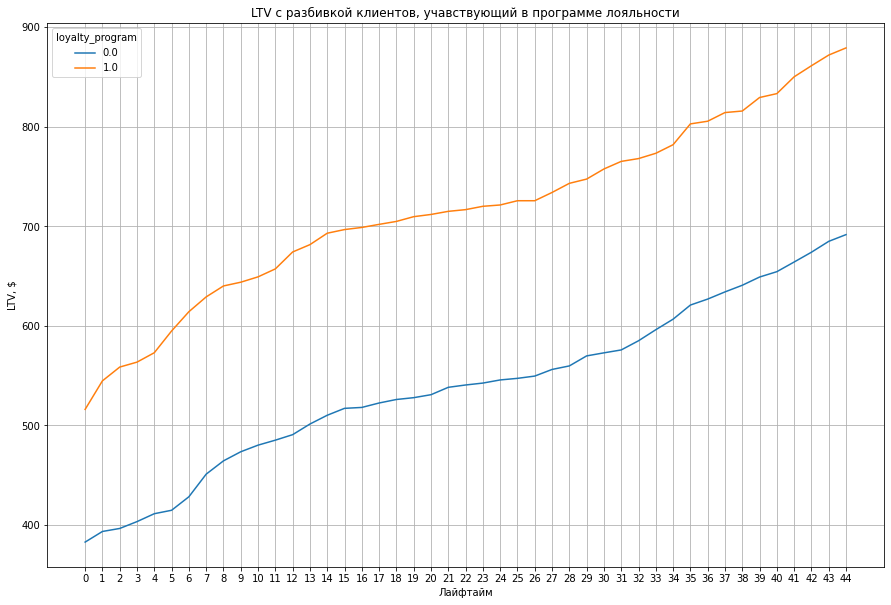

In [ ]:
# строим кривые LTV

ltv_raw, ltv, ltv_history = get_ltv(
    profiles, orders, datetime(2017, 2, 28).date(), 45, dimensions=['loyalty_program']
)


report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(15, 10), xticks=list(report.columns.values))
plt.title('LTV с разбивкой клиентов, учавствующий в программе лояльности')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.show()

Лояльных клиентов значительно меньше нелояльных клиентов. Однако, они демонстрируют значительно более высокий уровень доходности в каждом периоде. Это указывает на то, что клиенты, участвующие в программе лояльности, имеют более высокий потенциал для будущей прибыли в долгосрочной перспективе. В данном случае можно сказать, что программа лояльности является эффективным инструментом для стимулирования повторных покупок и удержания клиентов.

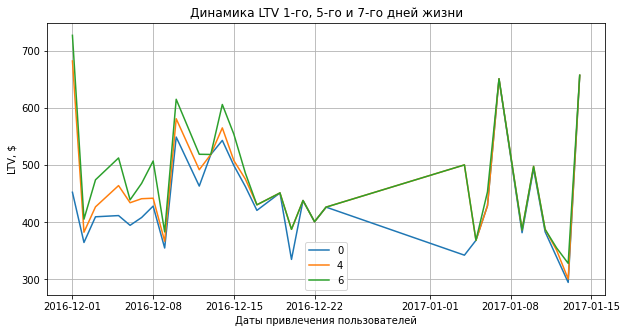

In [ ]:
# строим график истории изменений LTV

ltv_raw, ltv, ltv_history = get_ltv(
    profiles, orders, datetime(2017, 2, 28).date(), 45
)

report = ltv_history[[0, 4, 6]]  # делаем срез данных
report.plot(grid=True, figsize=(10, 5))
plt.title('Динамика LTV 1-го, 5-го и 7-го дней жизни')
plt.ylabel('LTV, $')
plt.xlabel('Даты привлечения пользователей')
plt.show()

Динамика абсолютно нестабильна - как растет, так и падает.

### RCR

RCR (Repeat Customer Rate) - это показатель, который измеряет долю повторных покупателей в определенный период времени.  

Рассчитаем RCR для лояльных клиентов:

In [ ]:
#группируем по customer_id, подсчтиаем количество повторных покупок для каждого лояльного покупателя
repeat_loyalty = loyalty.groupby('customer_id')['purchase_date'].count().reset_index()
repeat_loyalty = repeat_loyalty[repeat_loyalty['purchase_date'] > 1]

#рассчитаем количество повторных покупателей
num_repeat_loyalty = repeat_loyalty.shape[0]

#RCR
rcr_loyalty = round((num_repeat_loyalty / loyalty_count) * 100, 2)
print(f'RCR для лояльных клиентов: {rcr_loyalty}%')

RCR для лояльных клиентов: 96.09%


Рассчитаем RCR для нелояльных клиентов:

In [ ]:
#группируем по customer_id, подсчтиаем количество повторных покупок для каждого нелояльного покупателя
repeat_not_loyalty = not_loyalty.groupby('customer_id')['purchase_date'].count().reset_index()
repeat_not_loyalty = repeat_not_loyalty[repeat_not_loyalty['purchase_date'] > 1]

#рассчитаем количество повторных покупателей
num_repeat_not_loyalty = repeat_not_loyalty.shape[0]

#RCR
rcr_not_loyalty = round((num_repeat_not_loyalty / not_loyalty_count) * 100, 2)
print(f'RCR для нелояльных клиентов: {rcr_not_loyalty}%')

RCR для нелояльных клиентов: 96.55%


RCR для лояльных и неялольных клиентов отличный, 96% всех клиентов совершили посторную покупку. У нелояльных коэффикциент на 0.46% больше.

### вывод

На основе данных, можно сделать вывод, что программа лояльности является эффективной в стимулировании повторных покупок и удержании клиентов. Клиенты, участвующие в программе лояльности, имеют немного более низкий коэффициент удержания (RCR) в сравнении с нелояльными клиентами (96.09% против 96.55%), однако, они продемонстрировали значительно более высокий уровень доходности в каждом периоде. Это говорит о том, что программа лояльности привлекает клиентов с более высокой склонностью к покупкам.

Таким образом, можно считать программу лояльности эффективной в увеличении выручки и удержании ценных клиентов.

## Проверка гипотез

Проверим две статистические гипотезы. В качестве уровня значимости alpha примем 0.05 (5%).

### *Гипотеза 1. Средний чек участников программы лояльности отличается от среднего чека неучастников.*

* Нулевая гипотеза (H0): Средний чек участников программы лояльности равен среднему чеку неучастников.
* Альтернативная гипотеза (H1): Средний чек участников программы лояльности отличается от среднего чека неучастников.

In [ ]:
#получим две выборки - создим столбец с итоговой суммой покупки для лояльных и нелояльных клиентов
loyalty_check = loyalty.groupby('purchase_id').agg({'revenue':'sum'})
not_loyalty_check = not_loyalty.groupby('purchase_id').agg({'revenue':'sum'})

Применим критерий Манна-Уитни, т.к. есть предположение, что данные не соответствуют предположению о нормальности распределения.

In [ ]:
#применим критерий Манна-Уитни для сравнения выборок
statistic, p_value = mannwhitneyu(loyalty_check, not_loyalty_check)

alpha = 0.05

print("Статистика критерия Манна-Уитни:", statistic)
print("p-значение:", p_value)

if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Принимаем нулевую гипотезу")

Статистика критерия Манна-Уитни: [1942080.5]
p-значение: [0.26287956]
Принимаем нулевую гипотезу


По результатам теста мы принимаем нулевую гипотезу - средний чек участников программы лояльности равен среднему чеку неучастников.

### *Гипотеза 2. Количество покупок зависит от участия в программе лояльности.*



* Нулевая гипотеза (H0): Количество покупок не зависит от участия в программе лояльности.
* Альтернативная гипотеза (H1): Количество покупок зависит от участия в программе лояльности.

Применим критерий Манна-Уитни, т.к. есть предположение, что данные не соответствуют предположению о нормальности распределения.

In [ ]:
#посчитаем количество покупок для каждого клиента
purchases = data.drop_duplicates(subset=['purchase_id']).groupby('customer_id')['purchase_id'].count()

#
loyal_customers = purchases[data['loyalty_program'] == 1]
non_loyal_customers = purchases[data['loyalty_program'] == 0]

# Применение критерия Манна-Уитни
statistic, p_value = mannwhitneyu(loyal_customers, non_loyal_customers)

alpha = 0.05

print("Статистика критерия Манна-Уитни:", statistic)
print("p-значение:", p_value)

if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Принимаем нулевую гипотезу")

Статистика критерия Манна-Уитни: 232632.0
p-значение: 0.16709202564646042
Принимаем нулевую гипотезу


По результатам теста мы принимаем нулевую гипотезу - количество покупок не зависит от участия в программе лояльности.

### вывод

По результатам двух статистических тестов можем сделать вывод, что программа лояльности никак не влияет на средний чек - он одинаков как для лояльных так и не для лояльных клиентов и на количество покупок - количество не зависит от участия в программе лояльности.

## Выводы и рекомендации

На основании предоставленных данных и результатов теста, можно сделать вывод о потенциальной эффективности программы лояльности, однозначно сказать, что она эффективна нельзя.  Хотя средний чек и количество покупок не различаются значимо между участниками программы лояльности и неучастниками, клиенты, участвующие в программе лояльности, демонстрируют более высокий уровень доходности в каждом периоде. Это может указывать на их более высокий потенциал для будущей прибыли в долгосрочной перспективе.

Для повышения эффективности программы лояльности можно попробовать применить следующее:
* Персонализация предложений: разработать индивидуальные предложения и скидки для каждого клиента на основе его предпочтений, истории покупок и поведения. Это поможет усилить привлекательность программы и повысить уровень удовлетворенности клиентов.
* Бонусные системы: внедрить бонусные системы, где клиенты могут накапливать бонусные баллы за покупки и обменивать их на дополнительные скидки или привилегии. Это стимулирует повторные покупки и удержание клиентов в программе лояльности.
* Эксклюзивные предложения: Предоставить лояльным клиентам доступ к эксклюзивным акциям, предложениям или продуктам, которые недоступны обычным покупателям. Это создаст ощущение привилегированности и мотивирует клиентов оставаться в программе.